## For the anchors to work (links in q&a and index), please use a notebook viewer:

https://nbviewer.jupyter.org/github/justinmlam/yelp_in_vancouver/blob/master/yelp_project.ipynb

# Questions and their answers (click to redirect to answer)

"How much is quality of food weighed against other factors of the experience? (ambiance, service etc)"

"What is the most highly rated category of restaurant?"

"What restaurant categories don't exist in Vancouver?"

[Summary Statistics](#summary-statistics)




# Index (click to redirect to section)

## [Data pre-processing](#data-preprocessing)
- [Clean the data](#clean-the-data)

## [Summary Statistics](#summary-statistics)
- Overall assessment of review_count, rating, price
- Categorical assessment of review_count, rating, price, total number





# Notes:
a quick google search says there are >5000 restaurants in vancouver.

using the yelp api, 3800 restaurants were able to be extracted, so about 75% of restaurants were found. API does not return businesses without any reviews, so that may be the cause for the missing data.

<a id="data-preprocessing"></a>

# Data Pre-processing
Read in the data and convert it to dataframe

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from yelphelpers import *

with open('data/vancouver_restaurants.json') as f:
    data = json.load(f)
    
with open('data/categories.json') as f:
    cats = json.load(f)

In [2]:
df = pd.DataFrame.from_dict(data, orient='columns')

<a id="clean-the-data"></a>

### Clean the data

Remove unnecessary data

One-hot encode categories list

Convert string data into numberic data (rating, price)

Add neighbourhood name based on zip code

In [3]:
# categories of restaurants in a list
restaurant_cats = [place['title'] for place in cats if 'restaurants' in place['parents']]

In [4]:
#  Remove unnecessary data
df = df.drop(columns=['image_url','is_closed','transactions','phone','display_phone'])
# replace number signs ($) with decimals
df.replace(['$','$$','$$$','$$$$'],[1.0,2.0,3.0,4.0], inplace=True)

# TODO::: Expand the list, "categories" into separate columns


df_categories = df[['id', 'categories']]
df.drop(columns=['categories'],inplace=True)
df.rename(columns={'alias':'r_alias'},inplace=True)

df_expanded = df.copy().merge(expand_list(df_categories.copy(), 'categories'))
df_categories = expand_list(df_categories,'categories')
df_categories = pd.concat([df_categories.drop(['categories'], axis=1), df_categories['categories'].apply(pd.Series)], axis=1)
df_categories = df_categories.groupby(['id']).agg(lambda x: tuple(x)).applymap(list).reset_index()

df = df.merge(df_categories, on='id')
df = df.drop('alias', 1).join(df.alias.str.join('|').str.get_dummies())

df_expanded = pd.concat([df_expanded.drop(['categories'], axis=1), df_expanded['categories'].apply(pd.Series)], axis=1)

#____________________________________________________________________________
# df_alias_title = df[['id','alias','title']]
# df = expand_list(df,'categories')
# df.rename(columns={'alias':'r_alias'},inplace=True)
# df = pd.concat([df.drop(['categories'], axis=1), df['categories'].apply(pd.Series)], axis=1)
# df_alias_title = df[['id','alias','title']]
# df_alias_title = df_alias_title.groupby(['id']).agg(lambda x: tuple(x)).applymap(list).reset_index()
# df.drop(columns=['alias','title'],inplace=True)
# df = df.merge(df_alias_title, on='id')
# # One-hot encode categories to be able to be used
# df = df.drop('title', 1).join(df.title.str.join('|').str.get_dummies())
#____________________________________________________________________________



# clean up some variables to leave more space
# df_categories = None

In [5]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df[df['id'] == '-3WdGZdZKHbi8-KorPggtw'])
    
# in each row is a restaurant, with one-hot encoded categories. a restaurant may have more than 1 category.

                          id                         r_alias  \
3786  -3WdGZdZKHbi8-KorPggtw  bubble-waffle-cafe-vancouver-6   

                    name                                                url  \
3786  Bubble Waffle Cafe  https://www.yelp.com/biz/bubble-waffle-cafe-va...   

      review_count  rating                                        coordinates  \
3786            33     3.0  {'latitude': 49.2254720567329, 'longitude': -1...   

      price                                           location     distance  \
3786    1.0  {'address1': '2639 E 49th Avenue', 'address2':...  6195.363957   

                              title  acaibowls  afghani  african  \
3786  [Waffles, Coffee & Tea, Soup]          0        0        0   

      airportlounges  arabian  arts  asianfusion  australian  austrian  \
3786               0        0     0            0           0         0   

      bagels  bakeries  bangladeshi  barbers  bars  bbq  beer_and_wine  \
3786       0         0        

### This is the markdown cell for anchor (double click me)
<a id="summary-statistics"></a>

### Summary Statistics

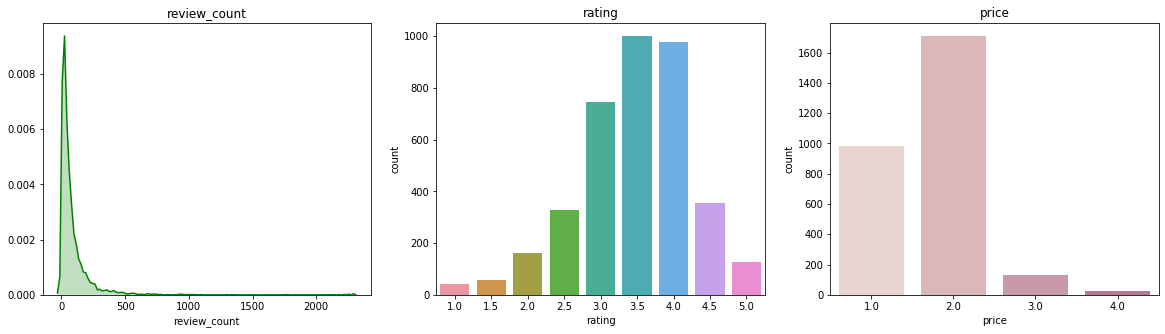

In [6]:
# review_count, rating, price

# review_count - line graph
# rating - histogram
# price - histogram

fig, axes = plt.subplots(1,3,figsize=(20,5))
sns.set_palette(sns.cubehelix_palette(8))
sns.distplot(df['review_count'], hist=False, color="g", ax=axes[0], kde_kws={"shade": True}).set_title('review_count')
sns.countplot(df['rating'],ax=axes[1]).set_title('rating')
sns.countplot(df['price'],ax=axes[2]).set_title('price')
plt.show()

In [7]:
# df_categories.head()
# We will be looking at category vs review_count, rating, coordinates, price, total  number
# because there are different number for each, we will be getting their average

In [8]:
# category - review_count, rating, price, total number
# rating difference


# total number | rating
# ___________________________
# review_count | price

# df_expanded = pd.concat([df_expanded.drop(['categories'], axis=1), df_expanded['categories'].apply(pd.Series)], axis=1)

In [9]:
# num_restaurants

# bayes_avg(df_expanded.dropna(how='any'), 'alias', \
#           'price').sort_values(ascending=False).reset_index().sort_values('price', ascending=False)
# bayes_avg(df_expanded, 'alias', 'rating').sort_values(ascending=False)
# bayes_avg(df_expanded, 'alias', 'review_count').sort_values(ascending=False)
# nu = (df.drop(['id', 'r_alias', 'name','url','review_count','rating','coordinates','price','location', \
#          'distance', 'title'], axis=1).sum().sort_values(ascending=False))
# nu = nu.reset_index().iloc[:50]
# nu.rename(columns={'index': 'alias', 0:'total_num'}, inplace=True)
# print(nu)

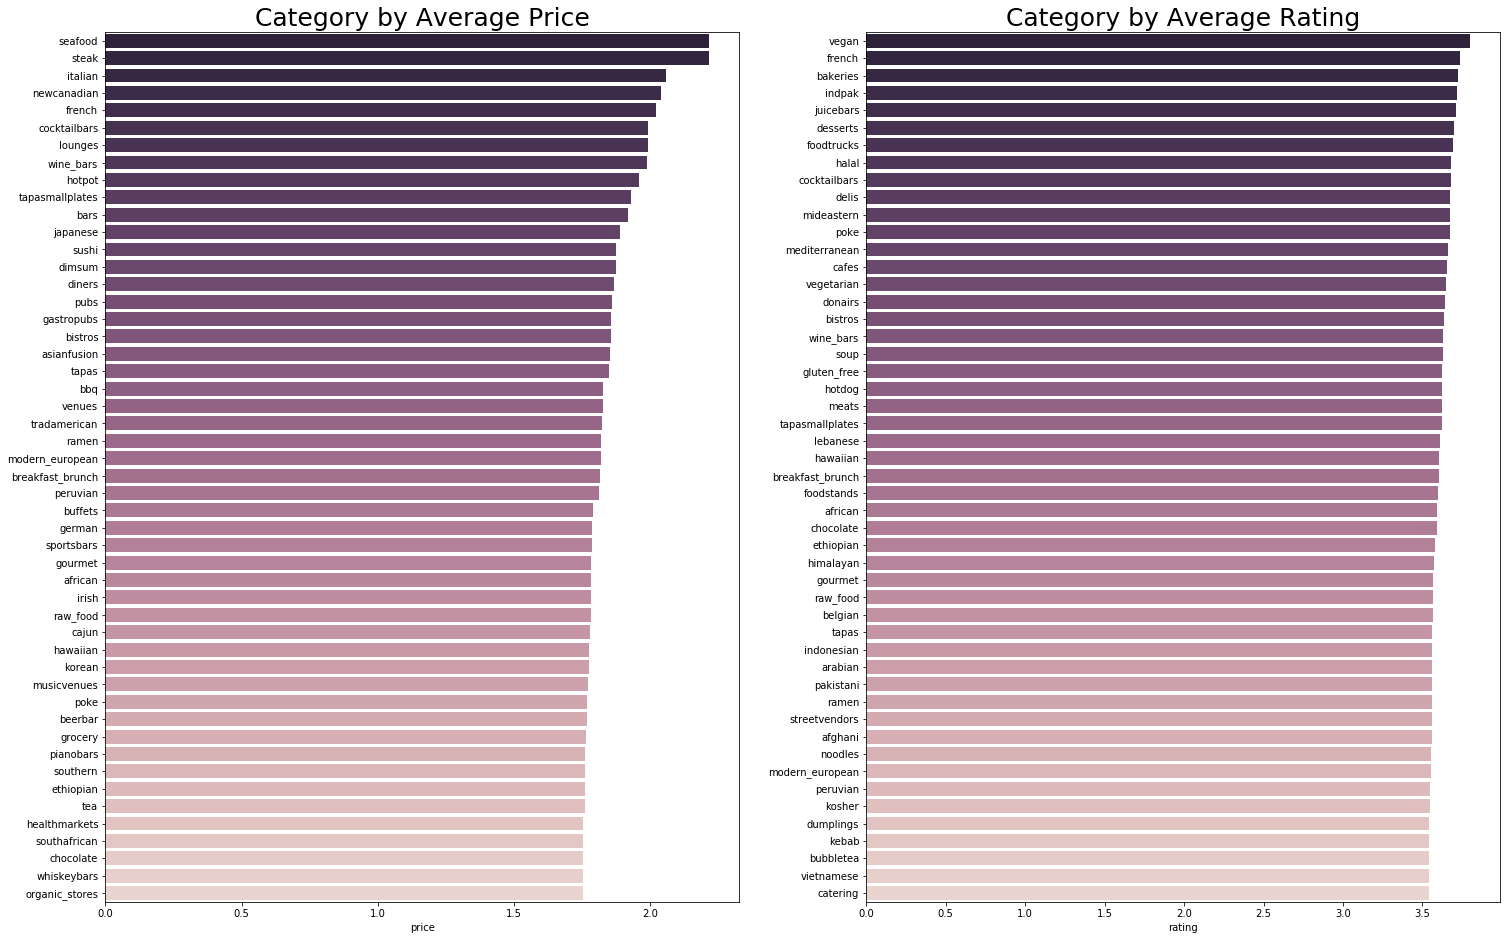

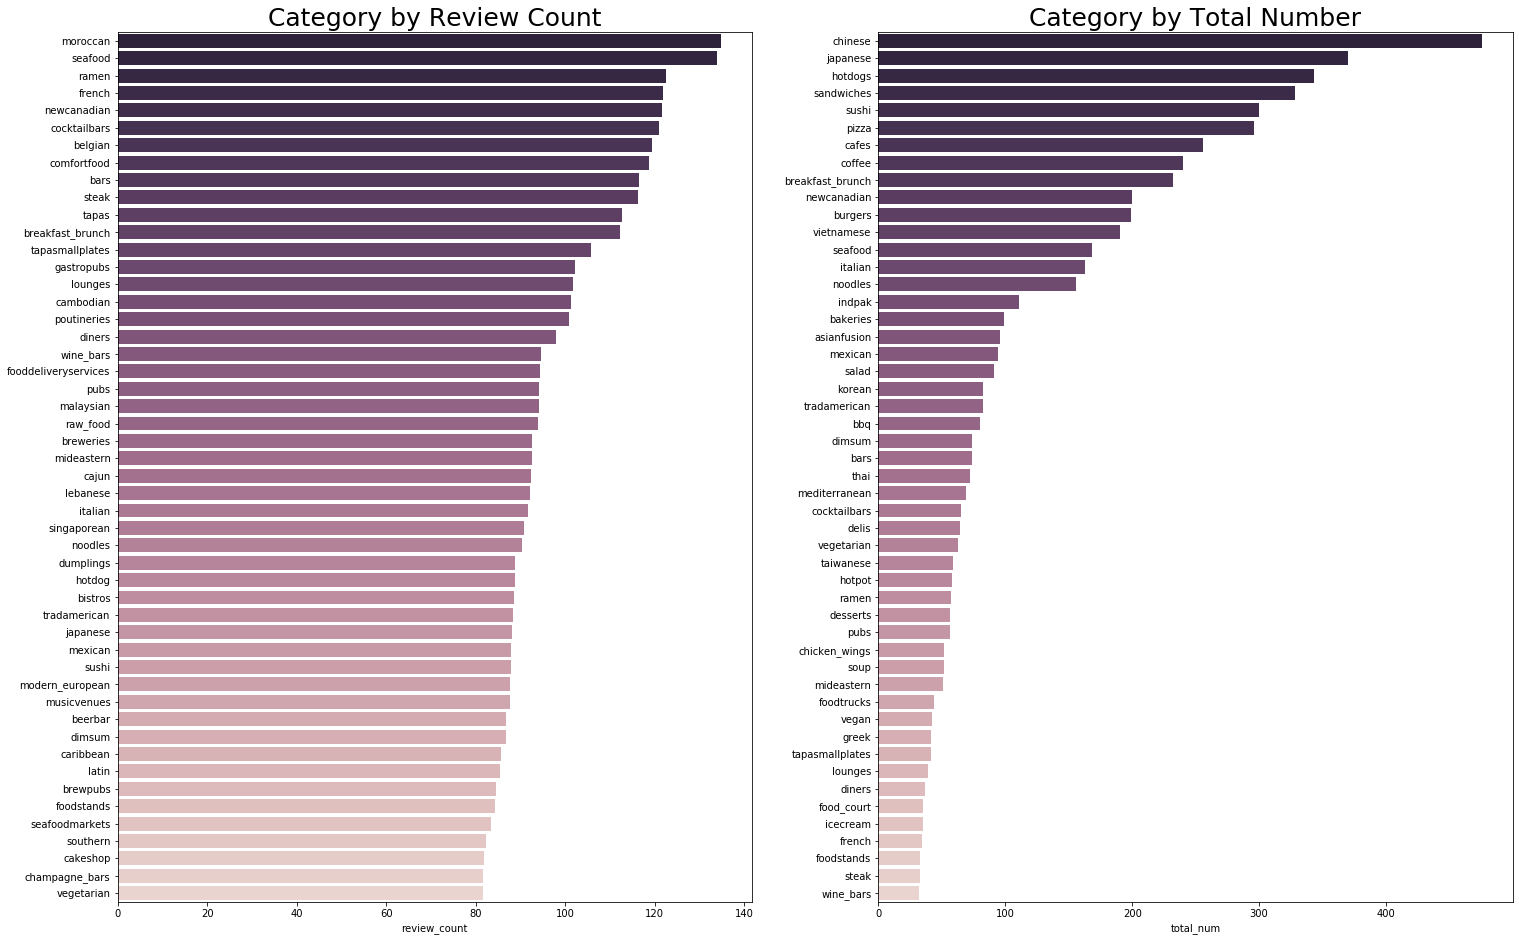

In [10]:
n = 50

### PRICE ###
pr = (bayes_avg(df_expanded.dropna(how='any'), 'alias', 'price').sort_values(ascending=False)
     .reset_index().sort_values('price', ascending=False))
pr = pr.iloc[:n]


### RATING
ra = (bayes_avg(df_expanded, 'alias', 'rating').sort_values(ascending=False)
     .reset_index().sort_values('rating', ascending=False))
ra = ra.iloc[:n]

### REVIEW_COUNT
re = (bayes_avg(df_expanded, 'alias', 'review_count').sort_values(ascending=False)
     .reset_index().sort_values('review_count', ascending=False))
re = re.iloc[:n]

### NUMBER OF RESTAURANTS
nu = (df.drop(['id', 'r_alias', 'name','url','review_count','rating','coordinates','price','location', \
         'distance', 'title'], axis=1).sum().sort_values(ascending=False))
nu = nu.reset_index().iloc[:n]
nu.rename(columns={'index': 'alias', 0:'total_num'}, inplace=True)




# first fig
fig, axes = plt.subplots(1,2,figsize=(25,16))
sns.set_palette(sns.cubehelix_palette(8))
sns.barplot(data=pr,x='price',y='alias',orient='h',ax=axes[0], palette=sns.cubehelix_palette(n, reverse=True)).set_title('Category by Average Price', fontsize=25)
axes[0].set_ylabel('')

sns.barplot(data=ra,x='rating',y='alias',orient='h',ax=axes[1], palette=sns.cubehelix_palette(n, reverse=True)).set_title('Category by Average Rating', fontsize=25)
axes[1].set_ylabel('')

# second fig
fig, axes = plt.subplots(1,2,figsize=(25,16))
sns.set_palette('ch:8')

sns.barplot(data=re,x='review_count',y='alias',orient='h',ax=axes[0], palette=sns.cubehelix_palette(n, reverse=True)).set_title('Category by Review Count', fontsize=25)
axes[0].set_ylabel('')

sns.barplot(data=nu,x='total_num',y='alias',orient='h',ax=axes[1], palette=sns.cubehelix_palette(n, reverse=True)).set_title('Category by Total Number', fontsize=25)
axes[1].set_ylabel('')

plt.show()

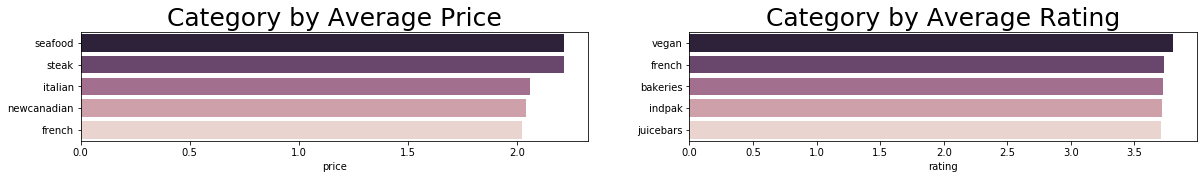

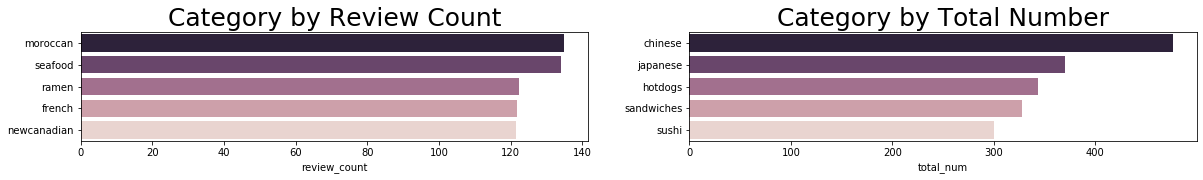

In [12]:
# let's map the top 5 of each category
m = 5

pr = pr.iloc[:m]
ra = ra.iloc[:m]
re = re.iloc[:m]
nu = nu.iloc[:m]

fig, axes = plt.subplots(1,2,figsize=(20,2))
sns.set_palette(sns.cubehelix_palette(8))
sns.barplot(data=pr,x='price',y='alias',orient='h',ax=axes[0], palette=sns.cubehelix_palette(m, reverse=True)).set_title('Category by Average Price', fontsize=25)
axes[0].set_ylabel('')

sns.barplot(data=ra,x='rating',y='alias',orient='h',ax=axes[1], palette=sns.cubehelix_palette(m, reverse=True)).set_title('Category by Average Rating', fontsize=25)
axes[1].set_ylabel('')

# second fig
fig, axes = plt.subplots(1,2,figsize=(20,2))
sns.set_palette('ch:8')

sns.barplot(data=re,x='review_count',y='alias',orient='h',ax=axes[0], palette=sns.cubehelix_palette(m, reverse=True)).set_title('Category by Review Count', fontsize=25)
axes[0].set_ylabel('')

sns.barplot(data=nu,x='total_num',y='alias',orient='h',ax=axes[1], palette=sns.cubehelix_palette(m, reverse=True)).set_title('Category by Total Number', fontsize=25)
axes[1].set_ylabel('')

plt.show()